# Imports

In [10]:
import pandas as pd, numpy as np
from numpy import random
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
import plotly.express as px

# Autoregressive (AR) Models of order p

In [20]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import arma_order_select_ic

\begin{eqnarray}
x_t &=& \alpha_1 x_{t-1} + \ldots + \alpha_p x_{t-p} + w_t \\
    &=& \sum_{i=1}^p \alpha_i x_{t-i} + w_t
\end{eqnarray}

## Alpha = 0.6

In [4]:
random.seed(1)
x = w = random.randn(100)
for t in range(1,100):
    x[t] = 0.6 * x[t-1] + w[t]

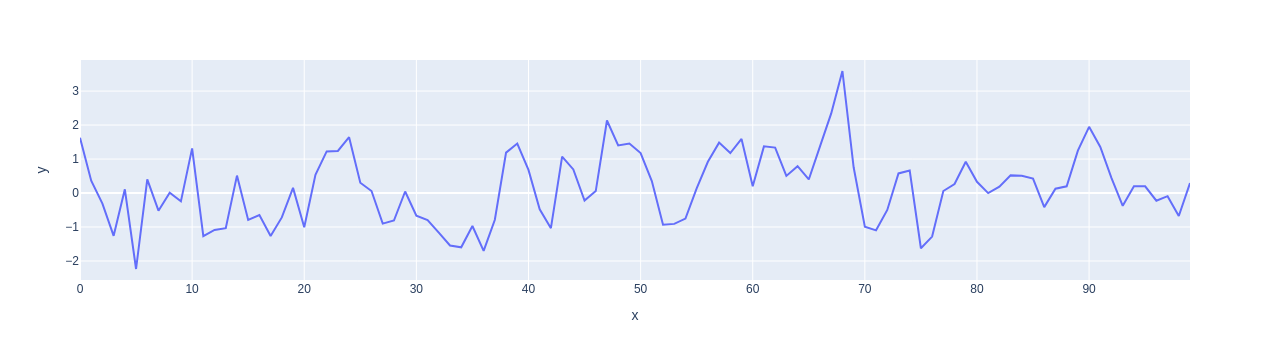

In [15]:
fig = px.scatter(y=x)

fig.update_traces(
    mode='lines',
)

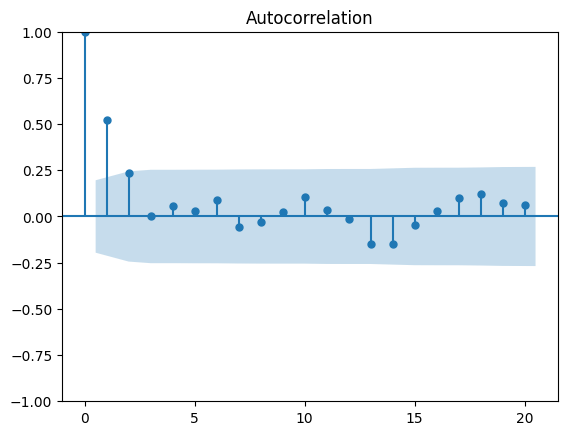

In [17]:
plot_acf(x);

In [24]:
model = AutoReg(x, lags=1)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -126.913
Method:               Conditional MLE   S.D. of innovations              0.872
Date:                Tue, 27 Aug 2024   AIC                            259.825
Time:                        16:05:56   BIC                            267.610
Sample:                             1   HQIC                           262.975
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0558      0.088      0.630      0.529      -0.118       0.229
y.L1           0.5247      0.084      6.221      0.000       0.359       0.690
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9059           +0.0000j            1.9059            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
results.params[1] + np.array([-1.96, 1.96]) * results.bse[1]

array([0.35937009, 0.68999963])

## Alpha = -0.6

In [32]:
random.seed(1)
x = w = random.randn(100)
for t in range(1,100):
    x[t] = -0.6 * x[t-1] + w[t]

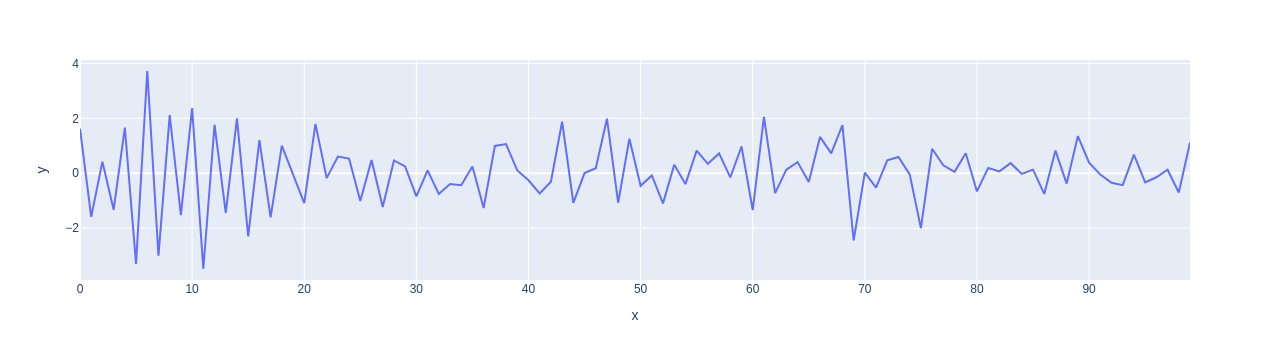

In [33]:
fig = px.scatter(y=x)

fig.update_traces(
    mode='lines',
)

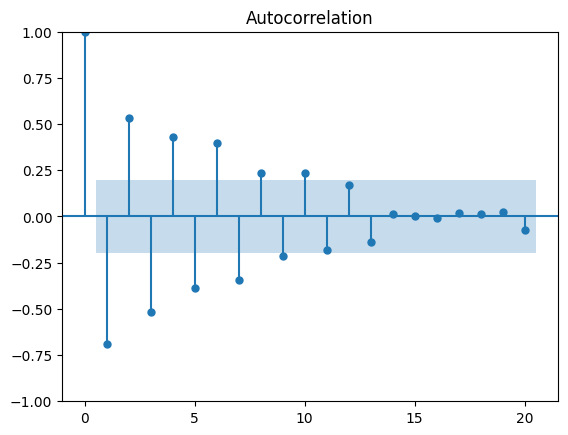

In [35]:
plot_acf(x, bartlett_confint=False);

In [36]:
model = AutoReg(x, lags=1)
results = model.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -126.427
Method:               Conditional MLE   S.D. of innovations              0.868
Date:                Tue, 27 Aug 2024   AIC                            258.853
Time:                        16:24:26   BIC                            266.639
Sample:                             1   HQIC                           262.003
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0478      0.087      0.548      0.584      -0.123       0.219
y.L1          -0.6955      0.072     -9.719      0.000      -0.836      -0.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4378           +0.0000j            1.4378            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
results.params[1] + np.array([-1.96, 1.96]) * results.bse[1]

array([-0.83578634, -0.55526589])

## AR(2)

In [39]:
random.seed(1)
x = w = random.randn(100)
for t in range(2,100):
    x[t] = 0.666*x[t-1] - 0.333*x[t-2] + w[t]

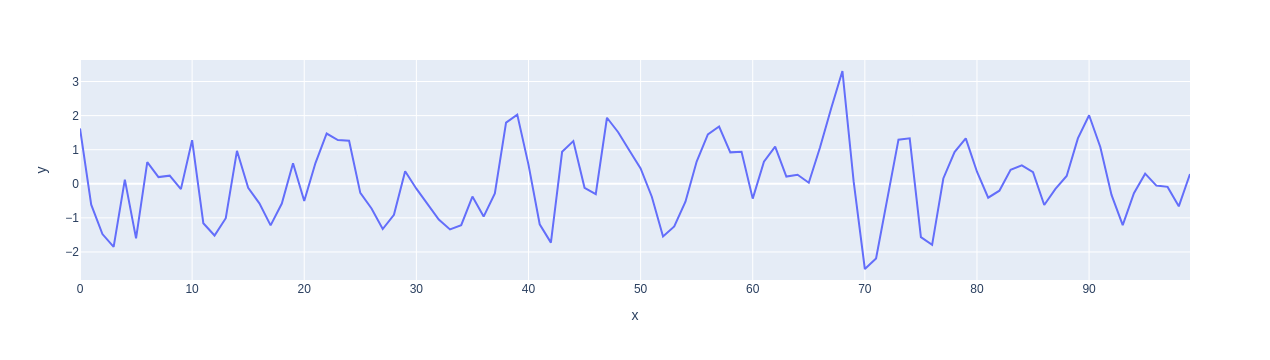

In [40]:
fig = px.scatter(y=x)

fig.update_traces(
    mode='lines',
)

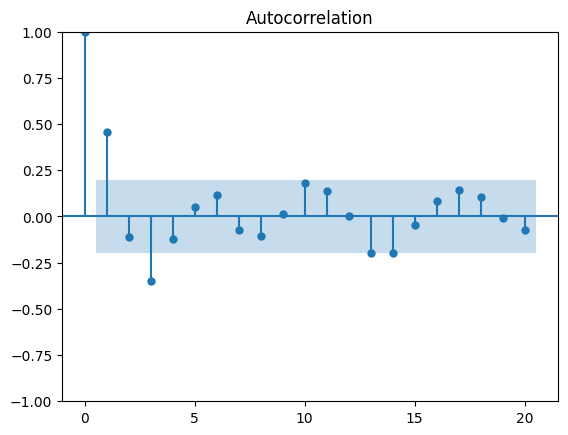

In [41]:
plot_acf(x, bartlett_confint=False);

In [42]:
model = AutoReg(x, lags=2)
results = model.fit()

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -125.600
Method:               Conditional MLE   S.D. of innovations              0.872
Date:                Tue, 27 Aug 2024   AIC                            259.200
Time:                        16:34:15   BIC                            269.540
Sample:                             2   HQIC                           263.382
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0579      0.088      0.656      0.512      -0.115       0.231
y.L1           0.6797      0.090      7.541      0.000       0.503       0.856
y.L2          -0.4282      0.089     -4.789      0.000      -0.604      -0.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7936           -1.3059j            1.5281           -0.1631
AR.2            0.7936           +1.3059j            1.5281            0.1631
-----------------------------------------------------------------------------
"""

## BTC Data

In [55]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
path_raw_data = Path() / '..' / '..' / 'token_labs_python' / 'data' / 'raw'

In [50]:
df_ohlc_1d_raw = pd.read_csv(path_raw_data / 'ohlc_1d_binance_bybit_swaps.csv')
df_btc_1d = (
    df_ohlc_1d_raw
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .query('exchange == "binance" and instrument == "BTCUSDT"')
    .assign(range = lambda x: x['high'] - x['low'])
    .assign(range_perc = lambda x: x['range'] / x['open'])
    .assign(log_return = lambda x: np.log(x['close']).diff())
    .sort_values('datetime')
)

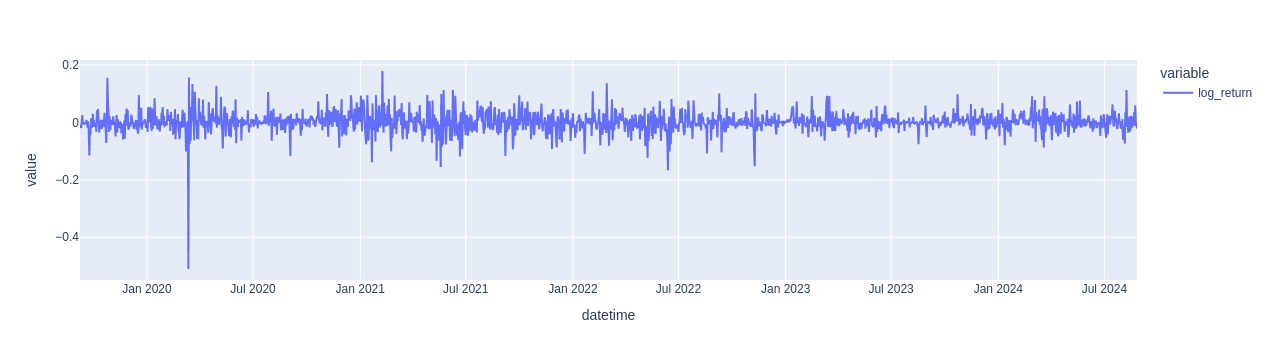

In [66]:
(
    df_btc_1d
    .set_index('datetime')
    ['log_return']
    # .ewm(span=30)
    # .mean()
    .plot(backend='plotly')
)

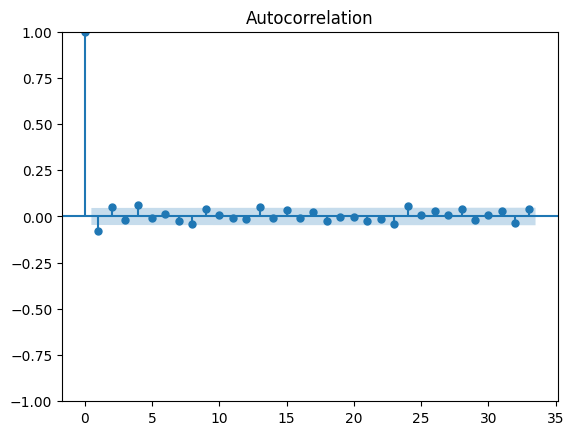

In [68]:
plot_acf(
    (
        df_btc_1d['log_return']
        .dropna()
        .values
    ),
    bartlett_confint=True
);

In [70]:
model = AutoReg(df_btc_1d['log_return'].dropna().values, lags=4)
results = model.fit()

In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1814
Model:                     AutoReg(4)   Log Likelihood                3497.114
Method:               Conditional MLE   S.D. of innovations              0.035
Date:                Tue, 27 Aug 2024   AIC                          -6982.227
Time:                        16:55:21   BIC                          -6949.221
Sample:                             4   HQIC                         -6970.047
                                 1814                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.178      0.239      -0.001       0.003
y.L1          -0.0714      0.023     -3.043      0.002      -0.117      -0.025
y.L2           0.0427      0.024      1.816      0.069      -0.003       0.089
y.L3          -0.0077      0.024     -0.329      0.742      -0.054       0.038
y.L4           0.0596      0.023      2.538      0.011       0.014       0.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8360           -0.0000j            1.8360           -0.5000
AR.2            2.0409           -0.0000j            2.0409           -0.0000
AR.3           -0.0374           -2.1161j            2.1165           -0.2528
AR.4           -0.0374           +2.1161j            2.1165            0.2528
-----------------------------------------------------------------------------
"""

In [74]:
coef = results.params[1:]
[coef + np.array([-1.96,1.96])*results.bse[i] for i, coef in enumerate(results.params[1:])]

[array([-0.07300277, -0.06976782]),
 array([-0.00327825,  0.08869514]),
 array([-0.05384645,  0.03835915]),
 array([0.01347841, 0.1056749 ])]

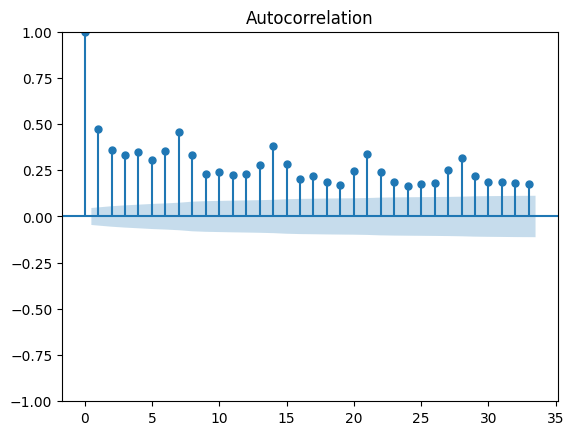

In [61]:
plot_acf(
    np.log(
        df_btc_1d['range_perc']
        .dropna()
        .values
    ),
    bartlett_confint=True
);

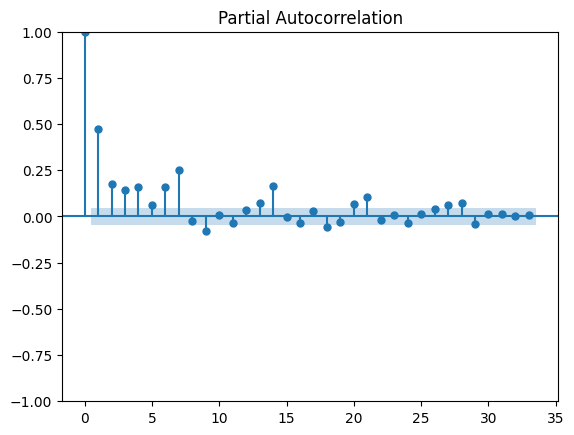

In [63]:
plot_pacf(
    np.log(
        df_btc_1d['range_perc']
        .dropna()
        .values
    ),
);

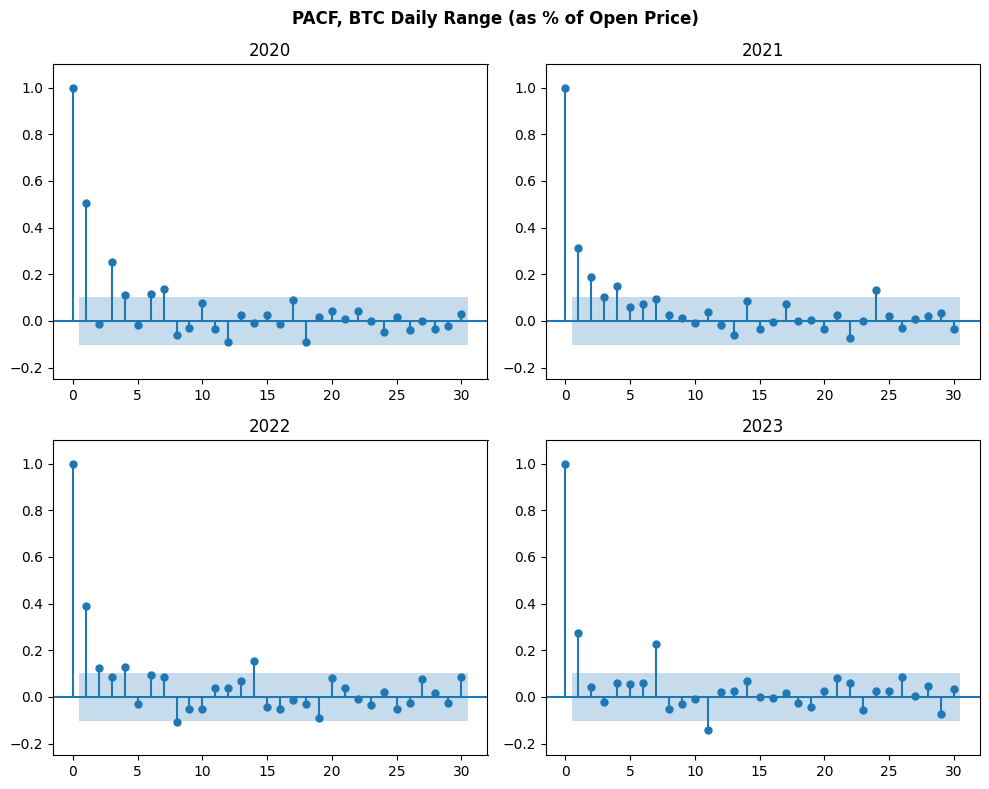

In [58]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ranges_2020 = df_btc_1d.set_index('datetime').loc['2020', 'range_perc'].dropna()
ranges_2021 = df_btc_1d.set_index('datetime').loc['2021', 'range_perc'].dropna()
ranges_2022 = df_btc_1d.set_index('datetime').loc['2022', 'range_perc'].dropna()
ranges_2023 = df_btc_1d.set_index('datetime').loc['2023', 'range_perc'].dropna()

# Plot ACF for each dataset in the grid
plot_pacf(ranges_2020, ax=axes[0, 0], lags=30)#, bartlett_confint=False)
axes[0, 0].set_title('2020')
axes[0, 0].set_ylim(-0.25, 1.1)

plot_pacf(ranges_2021, ax=axes[0, 1], lags=30)#, bartlett_confint=False)
axes[0, 1].set_title('2021')
axes[0, 1].set_ylim(-0.25, 1.1)

plot_pacf(ranges_2022, ax=axes[1, 0], lags=30)#, bartlett_confint=False)
axes[1, 0].set_title('2022')
axes[1, 0].set_ylim(-0.25, 1.1)

plot_pacf(ranges_2023, ax=axes[1, 1], lags=30)#, bartlett_confint=False)
axes[1, 1].set_title('2023')
axes[1, 1].set_ylim(-0.25, 1.1)

plt.suptitle('PACF, BTC Daily Range (as % of Open Price)', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.savefig('BTC_PACF_by_year', dpi=300)
plt.show()

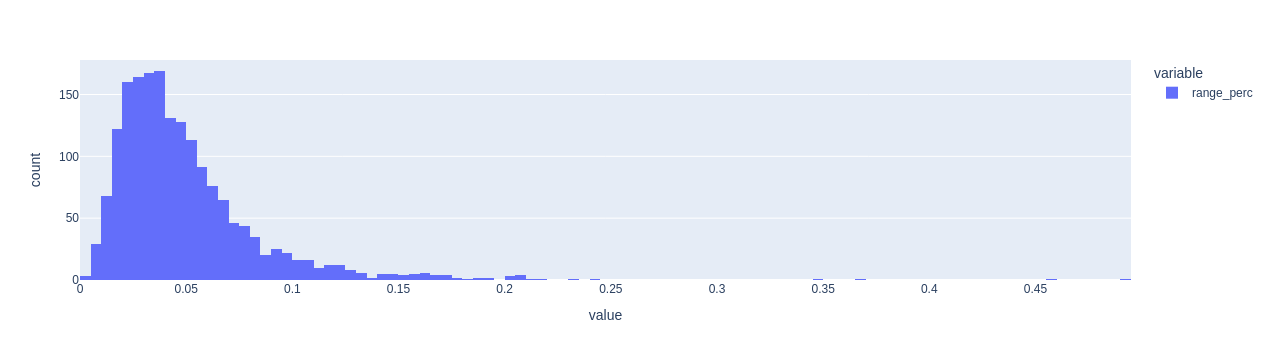

In [59]:
px.histogram(df_btc_1d['range_perc'])

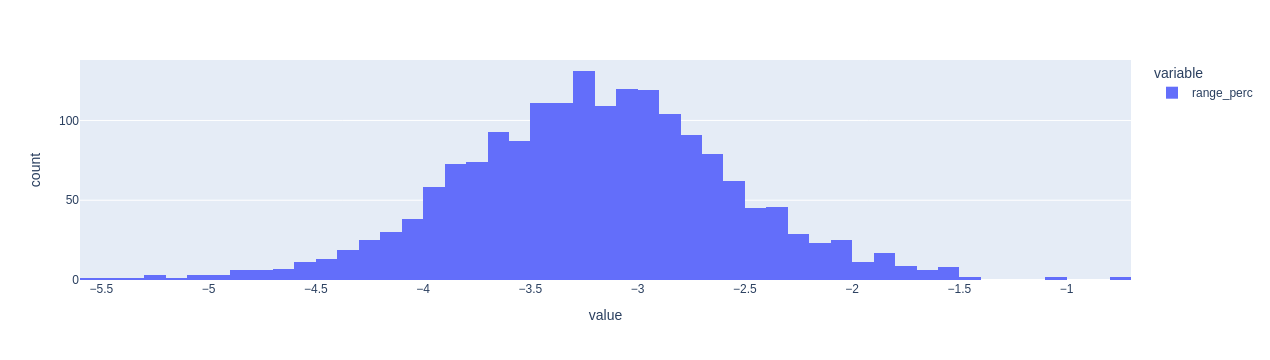

In [60]:
px.histogram(np.log(df_btc_1d['range_perc']))